<a href="https://colab.research.google.com/github/1911521014SitiNina/Kel-4-APM/blob/main/Automobile_SimpleRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [271]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [272]:
#memanggil dataset
dataset = pd.read_excel('auto_mobile.xlsx',usecols=['engine_size','price'])

In [273]:
#menampilkan sebagian isi dataset
df = pd.DataFrame(dataset)
df.head()

,engine_size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [274]:
df.shape

(201, 2)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine_size  201 non-null    int64  
 1   price        201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [276]:
df.describe()

,engine_size,price
count,201.000000,201.000000
mean,126.875622,13207.129353
std,41.546834,7947.066342
min,61.000000,5118.000000
25%,98.000000,7775.000000
50%,120.000000,10295.000000
75%,141.000000,16500.000000
max,326.000000,45400.000000


In [277]:
value = df['engine_size'].quantile(0.98)
df = df.replace(np.inf, value)

In [278]:
# Mencari dan menangani missing values.
df.isnull().sum()

engine_size    0
price          0
dtype: int64

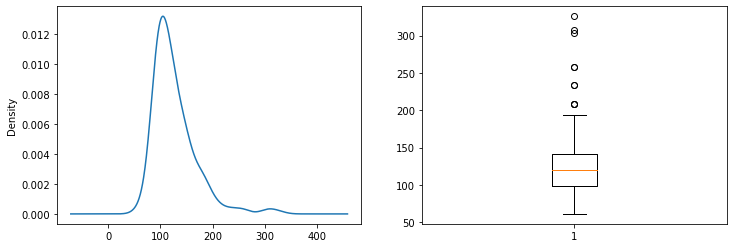

In [279]:
# Univerative analysis engine_size.
# Melihat distribusi dari engine_size.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['engine_size'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['engine_size'])
plt.show()

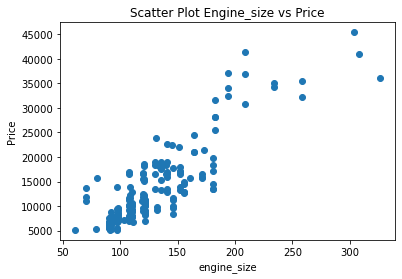

In [280]:
# Bivariate analysis horsepower dan price.
# Menggundang scatter plot.
plt.scatter(df['engine_size'], df['price'])
plt.xlabel('engine_size')
plt.ylabel('Price')
plt.title('Scatter Plot Engine_size vs Price')
plt.show()

In [281]:
# Mengetahui nilai korelasi dari engine_size dan price.
# Nilai korelasi adalah 0.87 termasuk kategori sangat tinggi.
df.corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


In [282]:
# Buat variable x dan y
x = df['engine_size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [283]:
from sklearn.model_selection import train_test_split
# kita split data kita menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [284]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [285]:
df.isnull().any().any()  #This code tells you if you have some NaN value in you dataframe

False

In [286]:
df.isnull().any()

engine_size    False
price          False
dtype: bool

In [287]:
# Only select rows that have all finite entries.
x = x[np.all(np.isfinite(x), axis=1)]

In [288]:
value = df['engine_size'].quantile(0.98)
df = df.replace(np.inf, value)

In [289]:
value = df['price'].quantile(0.98)
df = df.replace(np.inf, value)

In [290]:
data = df.fillna(method='ffill')

In [291]:
# training model menggunakan training data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [292]:
y_pred = lin_reg.predict(x_test)

In [293]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [294]:
# cari nilai koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[167.80716733]]
[-7845.02307109]


In [295]:
# Cari nilai accuracy score
print("Accuracy Score : ")
lin_reg.score(x_train, y_train)

Accuracy Score : 


0.7689849139748146

Text(0.5, 1.0, 'Plot Engine_Size vs Price')

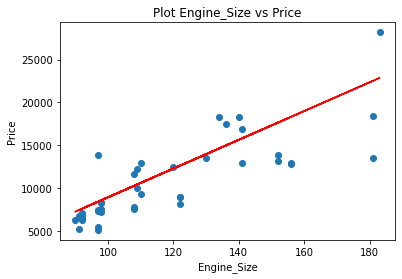

In [296]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Engine_Size')
plt.ylabel('Price')
plt.title('Plot Engine_Size vs Price')

In [301]:
# Prediksi harga moil dengan horsepower 100.
lin_reg.predict([[100]])

array([[8935.69366192]])

In [302]:
# Prediksi harga mobil dengan horsepower 150.
lin_reg.predict([[150]])

array([[17326.05202842]])

In [299]:
# Prediksi harga mobil dengan horsepower 200.
lin_reg.predict([[200]])

array([[25716.41039493]])

In [300]:
from sklearn.metrics import mean_squared_error
print ("Coefficient of determination :",lin_reg.score(y_test,y_prediksi))
print ("MSE: ",mean_squared_error(y_test,y_prediksi))
print ("RMSE: ",np.sqrt (mean_squared_error(y_test,y_prediksi)))

Coefficient of determination : -188223.14864070225
MSE:  9651640.044875748
RMSE:  3106.708876749759
